In [120]:
import qiskit
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit import *
import numpy as np
pi = np.pi

## Custom gate to convert the given integer values to binary

In [127]:
def integer_to_binary_converter(array, name = ' int_to_bin_conv'):
    qc = QuantumCircuit(7, name=name)
    
    # write the value of 1st element of the array at '00' address in fourier basis
    
    qc.x(range(2))
    qc.ccx(0,1,6)
    for qubit in range(2,6,1):
        qc.crz(array[0]*pi/(2**(5-qubit)), 6, qubit)
    qc.ccx(0,1,6)
    qc.x(range(2))
    qc.barrier()

    # write the value of 2nd element of the array at '01' address in fourier basis
    
    qc.x(1)
    qc.ccx(0,1,6)
    for qubit in range(2,6,1):
        qc.crz(array[1]*pi/(2**(5-qubit)), 6, qubit)
    qc.ccx(0,1,6)
    qc.x(1)
    qc.barrier()

    # write the value of 3rd element of the array at '10' address in fourier basis
    
    qc.x(0)
    qc.ccx(0,1,6)
    for qubit in range(2,6,1):
        qc.crz(array[2]*pi/(2**(5-qubit)), 6, qubit)
    qc.ccx(0,1,6)
    qc.x(0)
    qc.barrier()

    # write the value of 4th element of the array at '11' address in fourier basis
    
    qc.ccx(0,1,6)
    for qubit in range(2,6,1):
        qc.crz(array[3]*pi/(2**(5-qubit)), 6, qubit)
    qc.ccx(0,1,6)
    qc.barrier()
    
    # convert the values from fourier basis to computational basis
    
    qc.append(QFT(4).inverse(), qc.qubits[2:6])
    return qc

## Oracle to obtain the superposition of the indices of the alternating bitstrings

In [128]:
def oracle(name=' oracle'):
    qc = QuantumCircuit(7,name=name)
    
    # mark the data values having alternating bitstrings with '1' on the ancilla qubit
    
    qc.x(3)
    qc.x(5)
    qc.mct([2,3,4,5],6)
    qc.x(3)
    qc.x(5)
    qc.barrier()
    qc.x(2)
    qc.x(4)
    qc.mct([2,3,4,5],6)
    qc.x(2)
    qc.x(4)
    
    # obtain the superposition of the indices of the marked values
    
    qc.x(6)
    qc.cx(6,0)
    
    return qc

## Circuit that takes integer array of length 4 and gives the required superosition of the indices as output 

In [123]:
def desired_circuit():
    
    # input vector
    vector = np.array([1,5,7,10])
    
    # defining a quantum circuit with 7 qubits; 
    # qubits:0,1 are address qubits, 
    # qubits:2,3,4,5 are data qubits, 
    # qubit:6 is an ancilla qubit.
    
    qc = QuantumCircuit(7,2)
    
    # initializing address qubits and data qubits 
    
    qc.h(range(6))
    qc.barrier()   
    
    # append integer_to_binary_converter to convert integer array elements to binary
    
    qc.append(integer_to_binary_converter(vector), qc.qubits)
    qc.barrier()
    
    # append the oracle to get the output state at the output state written on the address qubits
    
    qc.append(oracle(), qc.qubits)
    qc.barrier()
    
    # measure the address qubits
    
    qc.measure([0,1],[0,1])
    
    return qc

## Histogram of the output state

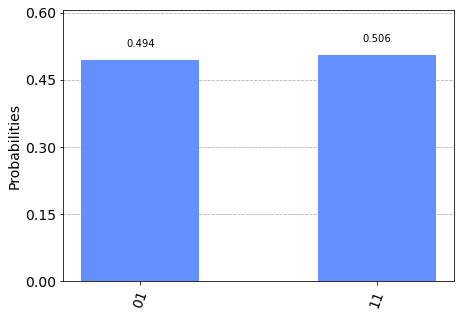

In [124]:
backend_simulator = Aer.get_backend('qasm_simulator')
result = execute(desired_circuit(), backend_simulator).result()
counts = result.get_counts()
plot_histogram(counts)

## Circuit diagram 

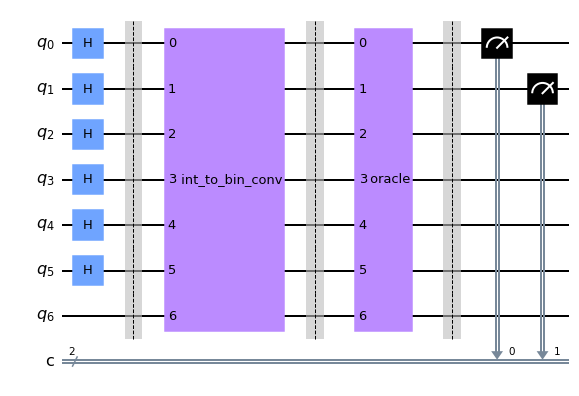

In [129]:
desired_circuit().draw('mpl')